In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
file = pd.read_csv(r'C:\Users\atiya\Desktop\NTI\Task\diabetes.csv')

In [3]:
file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df=file.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
check_0s_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
for i in check_0s_col:
    print(i,':',len(df[df[i]==0]))

Glucose : 5
BloodPressure : 35
SkinThickness : 228
Insulin : 374
BMI : 11


In [9]:
for col in check_0s_col:
        median_value = df[(df[col] != 0)][col].median()
        df.loc[(df[col] == 0) , col] = median_value

In [18]:
for i in check_0s_col:
    print(i,':',len(df[df[i]==0]))

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0


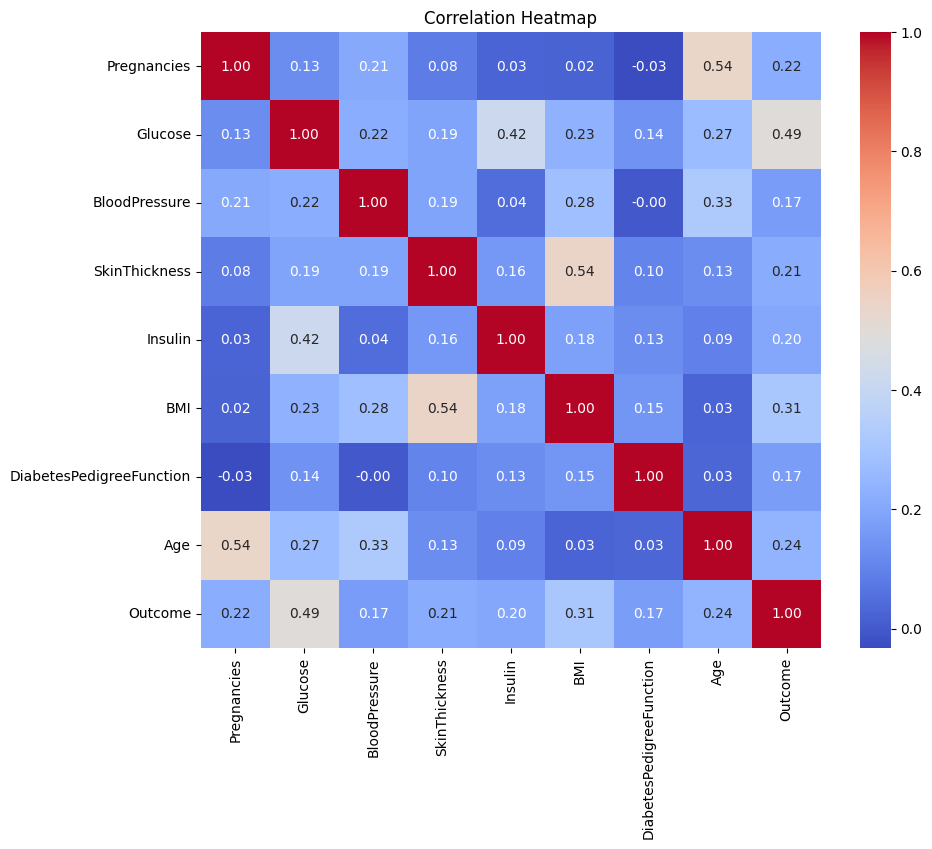

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

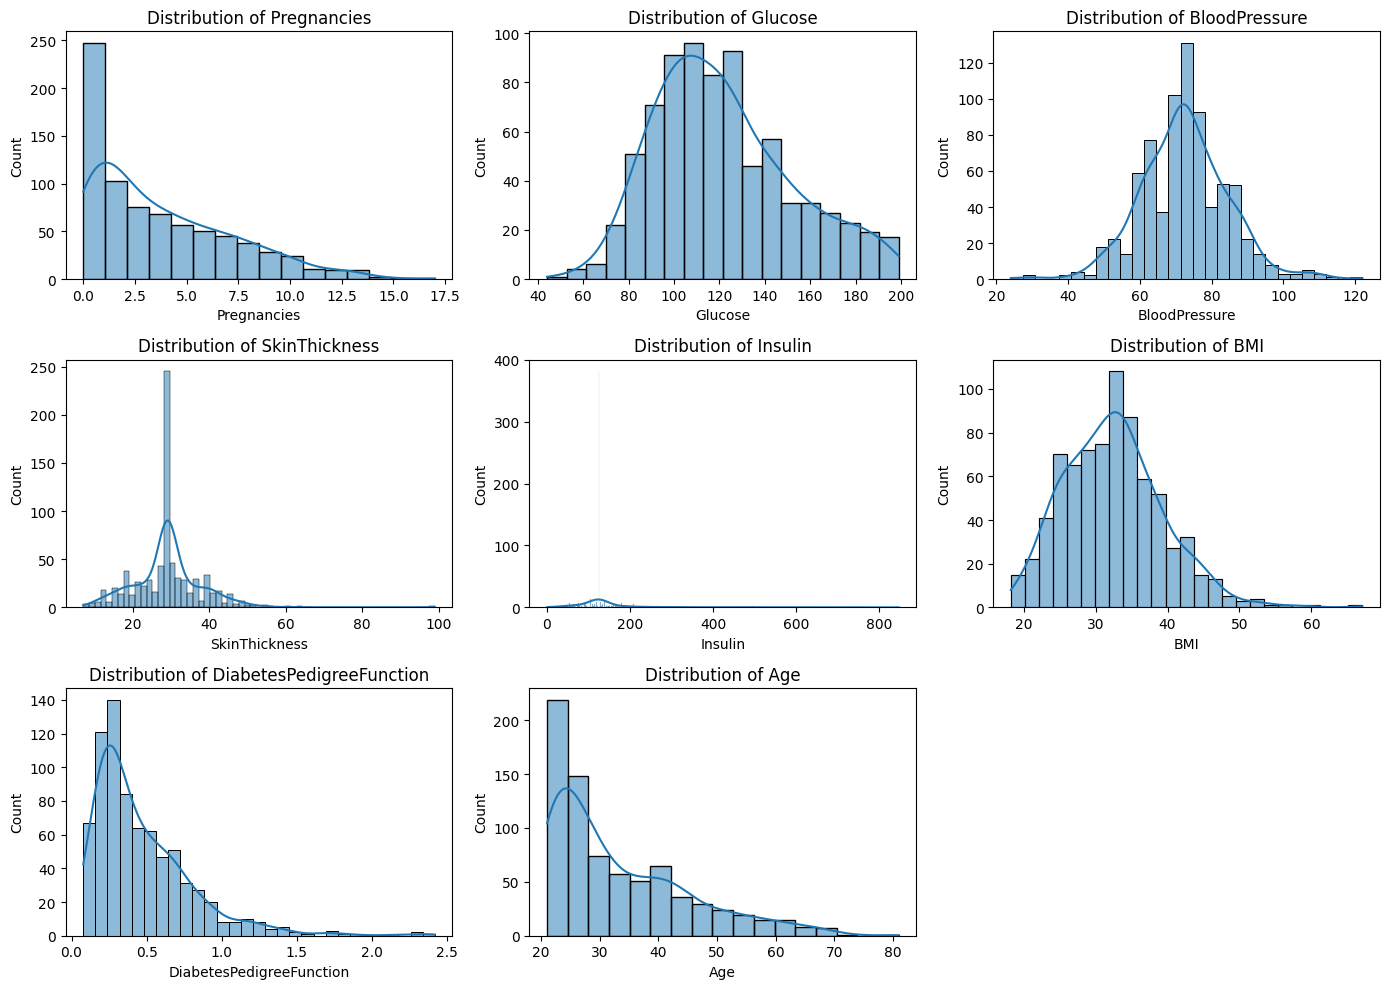

In [11]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

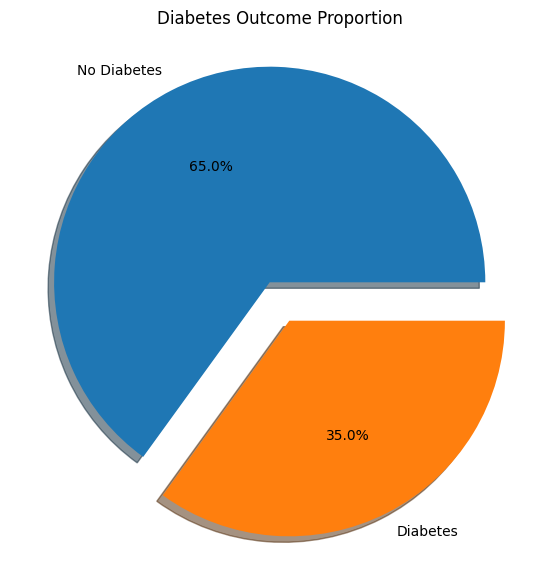

In [12]:
plt.figure(figsize=(8,7))
plt.pie(df['Outcome'].value_counts(), explode=[.1, .1], shadow=True, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Diabetes Outcome Proportion')
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

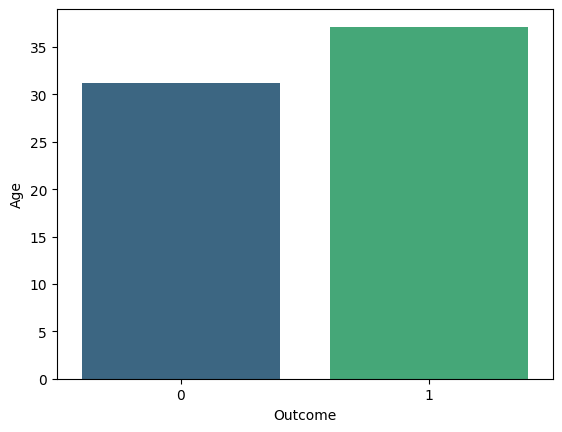

In [13]:
df_filtered = df.groupby('Outcome')['Age'].mean().reset_index()
sns.barplot(y=df_filtered['Age'], x=df_filtered['Outcome'], palette='viridis')

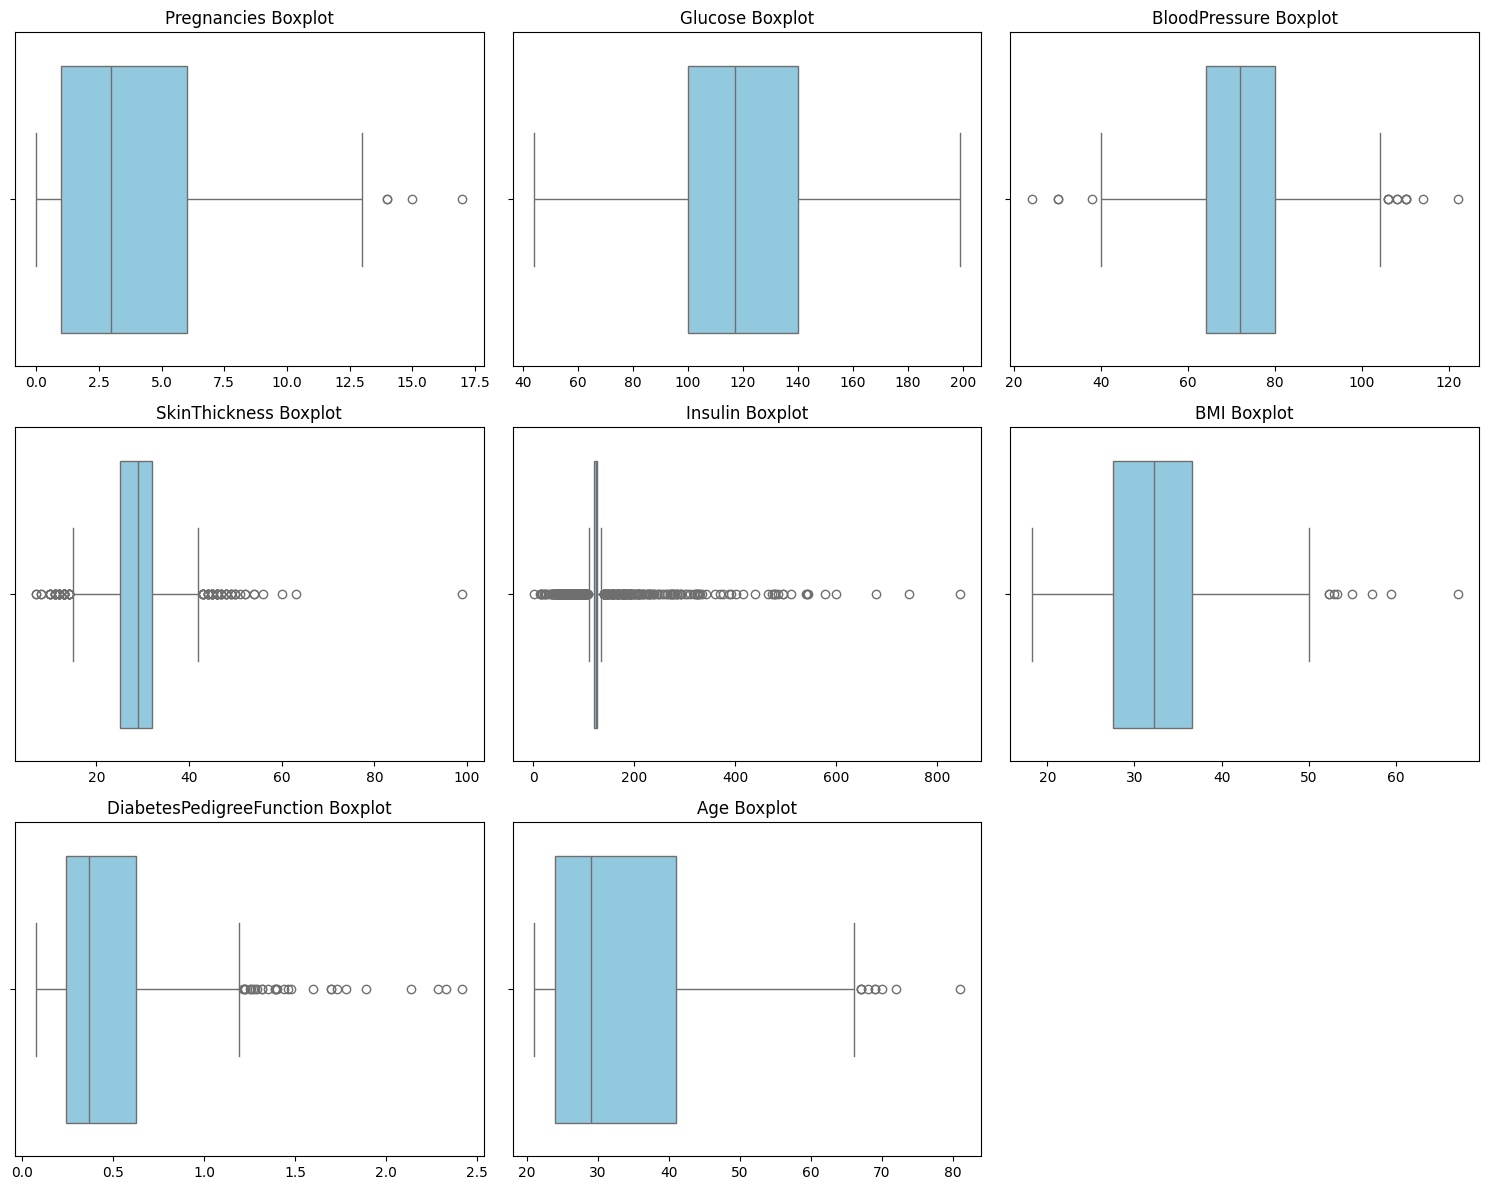

In [14]:
plt.figure(figsize=(3 * 5, 3 * 4))

for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'{col} Boxplot')
    plt.xlabel('')

plt.tight_layout()
plt.show()

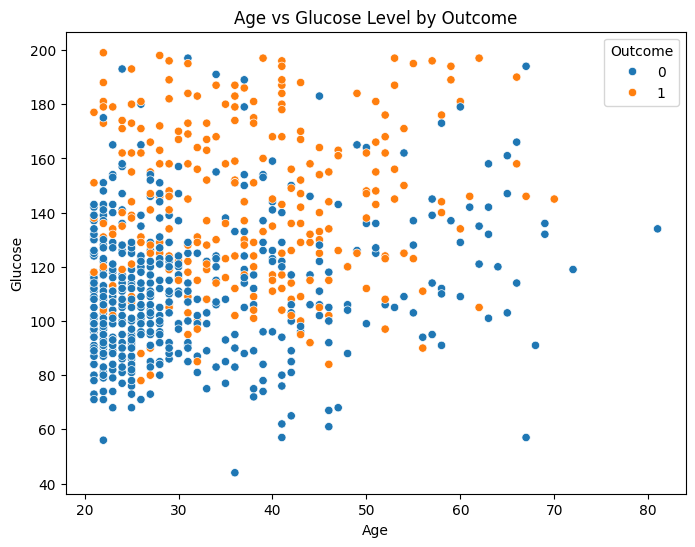

In [15]:
# Age vs Glucose Level by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title('Age vs Glucose Level by Outcome')
plt.show()

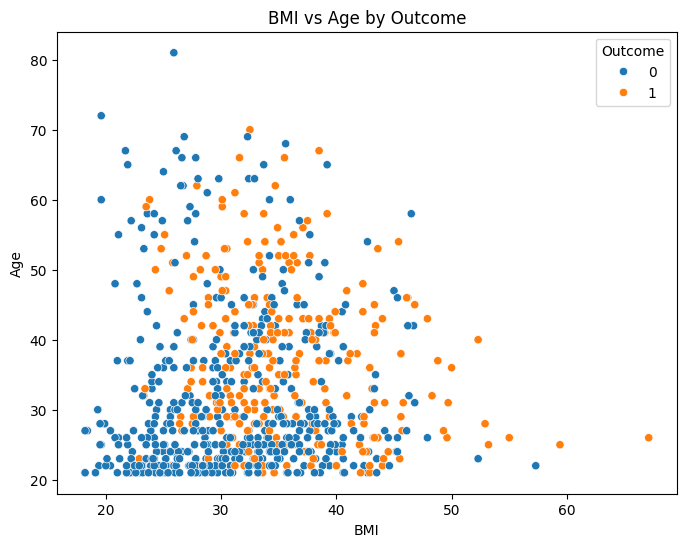

In [16]:
# BMI vs Age by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df)
plt.title('BMI vs Age by Outcome')
plt.show()

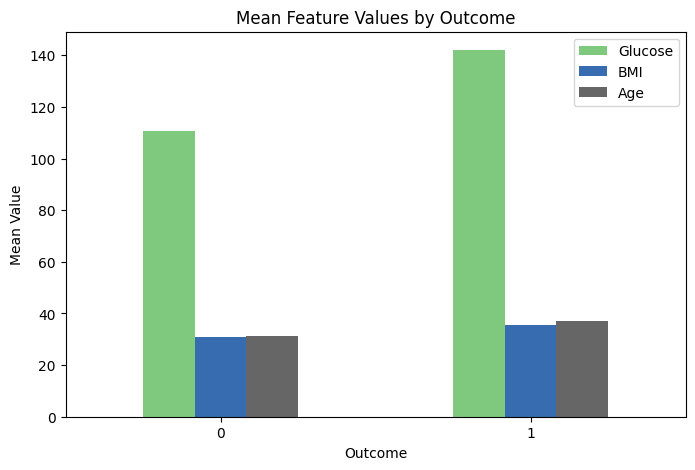

In [17]:
df.groupby('Outcome')[['Glucose', 'BMI', 'Age']].mean().plot(kind='bar', figsize=(8, 5), colormap='Accent')
plt.title('Mean Feature Values by Outcome')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()